In [27]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint,sample,random as rnd
import networkx as nx
from tqdm import tqdm
from scipy.stats import linregress
from bottleneck import move_mean as mm

In [2]:
def BarbasiAlbert_mAll_nx(m0=10,p0=0.2,n=10**5):
    g = nx.empty_graph(n)
    for i in range(1,m0):
        for j in range(i):
            if rnd() < p0:
                g.add_edge(i,j)
    degree = np.zeros(n,int)
    degree[:m0] = np.array(g.degree())[:m0,1]
    degree0 = np.where(degree[:m0] == 0)[0]
    if len(degree0):
        for i in degree0:
            j = (i+randint(1,m0-1)%m0)
            g.add_edge(i,j)
            degree[j] += 1
        degree[degree0] += 1
    g.add_nodes_from(np.arange(m0,n))
    nrange = np.arange(n)
    degree_sum = degree.sum()
    for i in range(m0,n):
        probs = degree[:i]/degree_sum
        tolinks = nrange[:i][np.random.random(i) < probs]
        if len(tolinks):
            for j in tolinks:
                g.add_edge(i,j)
            degree[:i][tolinks] += 1
            degree[i] = len(tolinks)
            degree_sum += len(tolinks)*2
    return g

def BarbasiAlbert_flexible_m_nx(m0=10,p0=0.2,n=10**5,m=None):
    if m is None:
        return BarbasiAlbert_mAll_nx(m0=m0,p0=p0,n=n)
    g = nx.empty_graph(n)
    if m is not None:
        if m >= m0:
            m0 = m+1
    for i in range(1,m0):
        for j in range(i):
            if rnd() < p0:
                g.add_edge(i,j)
    degree = np.zeros(n,int)
    degree[:m0] = np.array(g.degree())[:m0,1]
    degree0 = np.where(degree[:m0] == 0)[0]
    if len(degree0):
        for i in degree0:
            j = (i+randint(1,m0-1)%m0)
            g.add_edge(i,j)
            degree[j] += 1
        degree[degree0] += 1
    g.add_nodes_from(np.arange(m0,n))
    nrange = np.arange(n)
    degree_sum = degree.sum()
    if m is None:
        for i in range(m0,n):
            m = randint(1,i-2)
            probs = degree[:i]/degree_sum
            tolinks = np.random.choice(nrange[:i],size=m,p=probs,replace=False)
            for j in tolinks:
                g.add_edge(i,j)
            degree[:i][tolinks] += 1
            degree[i] = len(tolinks)
            degree_sum += len(tolinks)*2
    else:
        for i in range(m0,n):
            probs = degree[:i]/degree_sum
            tolinks = np.random.choice(nrange[:i],size=m,p=probs,replace=False)
            for j in tolinks:
                g.add_edge(i,j)
            degree[:i][tolinks] += 1
            degree[i] = len(tolinks)
            degree_sum += len(tolinks)*2
    return g

In [15]:
def BarbasiAlbert_mAll(m0=10,p0=0.2,n=10**5):
    neiz = [[] for i in range(n)]
    degree = np.zeros(n,int)
    for i in range(1,m0):
        for j in range(i):
            if rnd() < p0:
                neiz[i].append(j)
                neiz[j].append(i)
                degree[i] += 1
                degree[j] += 1
    degree0 = np.where(degree[:m0] == 0)[0]
    if len(degree0):
        for i in degree0:
            j = (i+randint(1,m0-1)%m0)
            neiz[i].append(j)
            neiz[j].append(i)
            degree[j] += 1
        degree[degree0] += 1
    nrange = np.arange(n)
    degree_sum = degree[:m0].sum()
    for i in range(m0,n):
        probs = degree[:i]/degree_sum
        tolinks = nrange[:i][np.random.random(i) < probs]
        if len(tolinks):
            for j in tolinks:
                neiz[i].append(j)
                neiz[j].append(i)
            degree[:i][tolinks] += 1
            degree[i] = len(tolinks)
            degree_sum += len(tolinks)*2
    return neiz,degree

def BarbasiAlbert_flexible_m(m0=10,p0=0.2,n=10**5,m=None):
    if m is None:
        return BarbasiAlbert_mAll(m0=m0,p0=p0,n=n)
    neiz = [[] for i in range(n)]
    degree = np.zeros(n,int)
    if m >= m0:
        m0 = m+1
    for i in range(1,m0):
        for j in range(i):
            if rnd() < p0:
                neiz[i].append(j)
                neiz[j].append(i)
                degree[i] += 1
                degree[j] += 1
    degree0 = np.where(degree[:m0] == 0)[0]
    if len(degree0):
        for i in degree0:
            j = (i+randint(1,m0-1)%m0)
            neiz[i].append(j)
            neiz[j].append(i)
            degree[j] += 1
        degree[degree0] += 1
    nrange = np.arange(n)
    degree_sum = degree[:m0].sum()
    for i in range(m0,n):
        probs = degree[:i]/degree_sum
        tolinks = np.random.choice(nrange[:i],size=m,p=probs,replace=False)
        for j in tolinks:
            neiz[i].append(j)
            neiz[j].append(i)
        degree[:i][tolinks] += 1
        degree[i] = len(tolinks)
        degree_sum += len(tolinks)*2
    return neiz,degree

def BarbasiAlbert_proportion_m(m0=10,p0=0.2,n=10**5,m=None):
    if m is None:
        return BarbasiAlbert_mAll(m0=m0,p0=p0,n=n)
    # neiz = [[] for i in range(n)]
    degree = np.zeros(n,int)
    if m >= 1:
        if m >= m0:
            if m >= n:
                return False
            m = m/n
        m = m/m0
    for i in range(1,m0):
        for j in range(i):
            if rnd() < p0:
                # neiz[i].append(j)
                # neiz[j].append(i)
                degree[i] += 1
                degree[j] += 1
    degree0 = np.where(degree[:m0] == 0)[0]
    if len(degree0):
        for i in degree0:
            j = (i+randint(1,m0-1)%m0)
            # neiz[i].append(j)
            # neiz[j].append(i)
            degree[j] += 1
        degree[degree0] += 1
    nrange = np.arange(n)
    degree_sum = degree[:m0].sum()
    for i in range(m0,n):
        probs = degree[:i]/degree_sum
        tolinks = np.random.choice(nrange[:i],size=int(m*i),p=probs,replace=False)
        # for j in tolinks:
            # neiz[i].append(j)
            # neiz[j].append(i)
        degree[:i][tolinks] += 1
        degree[i] = len(tolinks)
        degree_sum += len(tolinks)*2
    # return neiz,degree
    return degree

100%|██████████| 10000/10000 [00:01<00:00, 7763.17it/s]


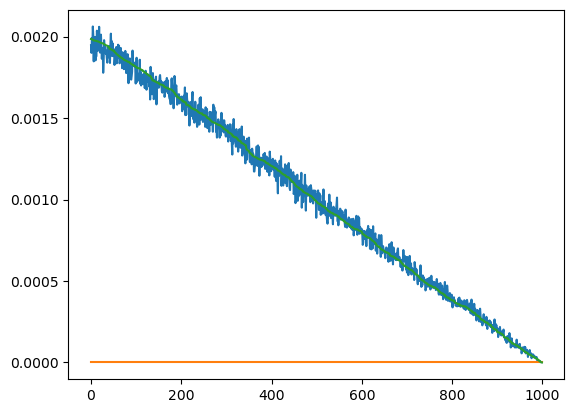

In [5]:
n = 10**3
m = 50
degs = np.random.random(n)
degs = np.sort(degs)[::-1]
nrange = np.arange(n)
q1_hist = np.zeros(n)
q2_hist = np.zeros(n)
bins = np.arange(n+1)
for ens in tqdm(range(10000)):
    probs = degs/degs.sum()
    q1 = np.random.choice(nrange,size=m,p=probs,replace=False)
    # q2 = np.zeros(m,int)
    # for i in range(m):
    #     q2[i] = np.random.choice(nrange,p=probs/probs.sum())
    #     probs[q2[i]] = 0
    q1_hist += np.histogram(q1,bins)[0]
    # q2_hist += np.histogram(q2,bins)[0]
q1_hist /= q1_hist.sum()
# q2_hist /= q2_hist.sum()
plt.plot(bins[:-1],q1_hist)
plt.plot(bins[:-1],q2_hist)
plt.plot(bins[:-1],degs/degs.sum())



LinregressResult(slope=-2.309122261479705, intercept=0.6559936282063008, rvalue=-0.9197278010244442, pvalue=2.3437375289700584e-22, stderr=0.1380082132009318, intercept_stderr=0.5039063995983208)
LinregressResult(slope=-2.777412244561172, intercept=4.457265271688205, rvalue=-0.9891568700392215, pvalue=1.6387150992782249e-47, stderr=0.05560395432921421, intercept_stderr=0.23400210297459595)
LinregressResult(slope=-2.9222627871841564, intercept=6.758394654093779, rvalue=-0.9901874351404634, pvalue=5.726161056811148e-41, stderr=0.06080806740714947, intercept_stderr=0.29303013449509285)
LinregressResult(slope=-2.9421456127542744, intercept=8.169951614684678, rvalue=-0.9889962699389664, pvalue=1.1777273662506107e-35, stderr=0.06873287802611021, intercept_stderr=0.3742071402893259)
LinregressResult(slope=-2.807150915409364, intercept=8.220314973419818, rvalue=-0.9921539774782474, pvalue=6.279378868431223e-36, stderr=0.05738271756121996, intercept_stderr=0.3302339926390203)
LinregressResult(s

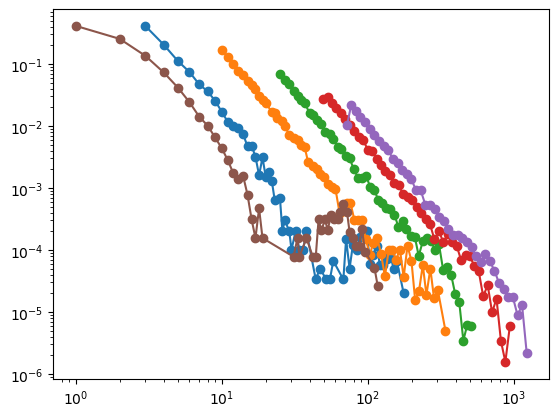

In [14]:
for m in [3,10,25,50,75,None]:
    neiz,degree = BarbasiAlbert_flexible_m(m0=100,m=m,n=10000)
    # degree = np.array(g.degree())[:,1]
    bins = np.unique(np.logspace(0,np.log10(degree.max()+1),100).astype(int))
    y = np.histogram(degree,bins,density=True)[0]
    nz = y!=0
    xx = bins[:-1][nz]
    yy = y[nz]
    plt.loglog()
    plt.plot(xx,yy,'-o')
    print(linregress(np.log(xx),np.log(yy)))
    # plt.show()

In [20]:
n = 10**4
mz = np.arange(0.1,1,0.1)
degreez = np.zeros((len(mz),n))
for mi,m in enumerate(mz):
    degreez[mi] = BarbasiAlbert_proportion_m(m0=10,m=m,n=n)

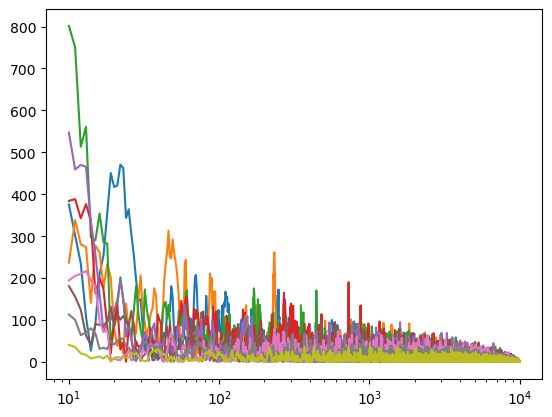

In [60]:
# plt.yscale("log")
plt.xscale("log")
for mi,m in enumerate(mz):
    degree = degreez[mi]
    plt.plot(np.arange(len(degree))+1,np.abs(mm(degree,10)-n*m))


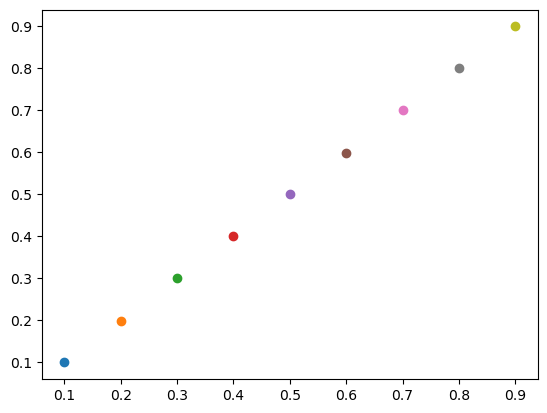

In [25]:
for mi,m in enumerate(mz):
    degree = degreez[mi]
    # bins = np.unique(np.logspace(0,np.log10(degree.max()+1),100).astype(int))
    bins = np.arange(1,degree.max()+2)
    y = np.histogram(degree,bins,density=True)[0]
    plt.scatter(m,np.argmax(y)/n)
    # nz = y!=0
    # xx = bins[:-1][nz]
    # yy = y[nz]
    # plt.loglog()
    # plt.plot(xx,yy,'-o')
    # print(linregress(np.log(xx),np.log(yy)))
    # # plt.show()

In [30]:
n = 10**4
m0 = 100
degez = np.zeros(n)
degez[1:m0] = np.random.randint(1,m0-1,m0-1)
degez[0] = degez[1:m0].sum()%2
m_mean = []
for i in range(m0,n):
    degez[i] += (np.random.random(i) < degez[:i]/degez[:i].sum()).sum()

In [32]:
np.random.random(i) < np.full(i,1/i)

array([False, False, False, ..., False, False, False])

In [31]:
degez[m0:].mean()

0.9934343434343434

LinregressResult(slope=-2.798769438738835, intercept=2.2961760884342546, rvalue=-0.9953815082911686, pvalue=8.0584199751645e-65, stderr=0.034280311970337304, intercept_stderr=0.14521283335471272)

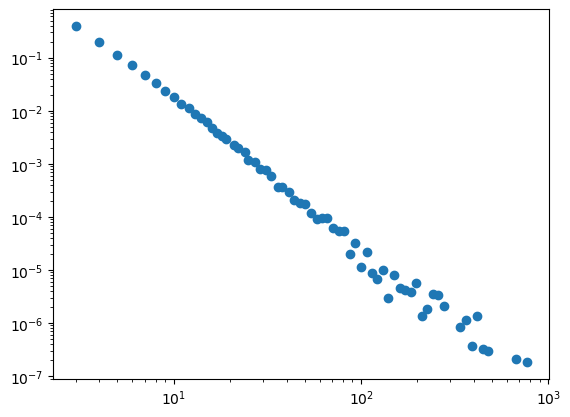

In [12]:
bins = np.unique(np.logspace(0,np.log10(degree.max()+1),100).astype(int))
y = np.histogram(degree,bins,density=True)[0]
nz = y!=0
xx = bins[:-1][nz]
yy = y[nz]
plt.loglog()
plt.scatter(xx,yy)
linregress(np.log(xx),np.log(yy))